成功读取Excel文件，列名: ['Gene Description', 'Gene Accession Number']
样本数: 72, 特征数: 7129
类别分布: (array([0, 1, 2]), array([38,  9, 25], dtype=int64))

Leukemia数据集基本信息:
数据形状: (72, 7129)
特征数: 7129
样本数: 72
真实类别数: 3
类别分布: {0: 38, 1: 9, 2: 25}

Leukemia数据集聚类分析

正在调参 kmeans...


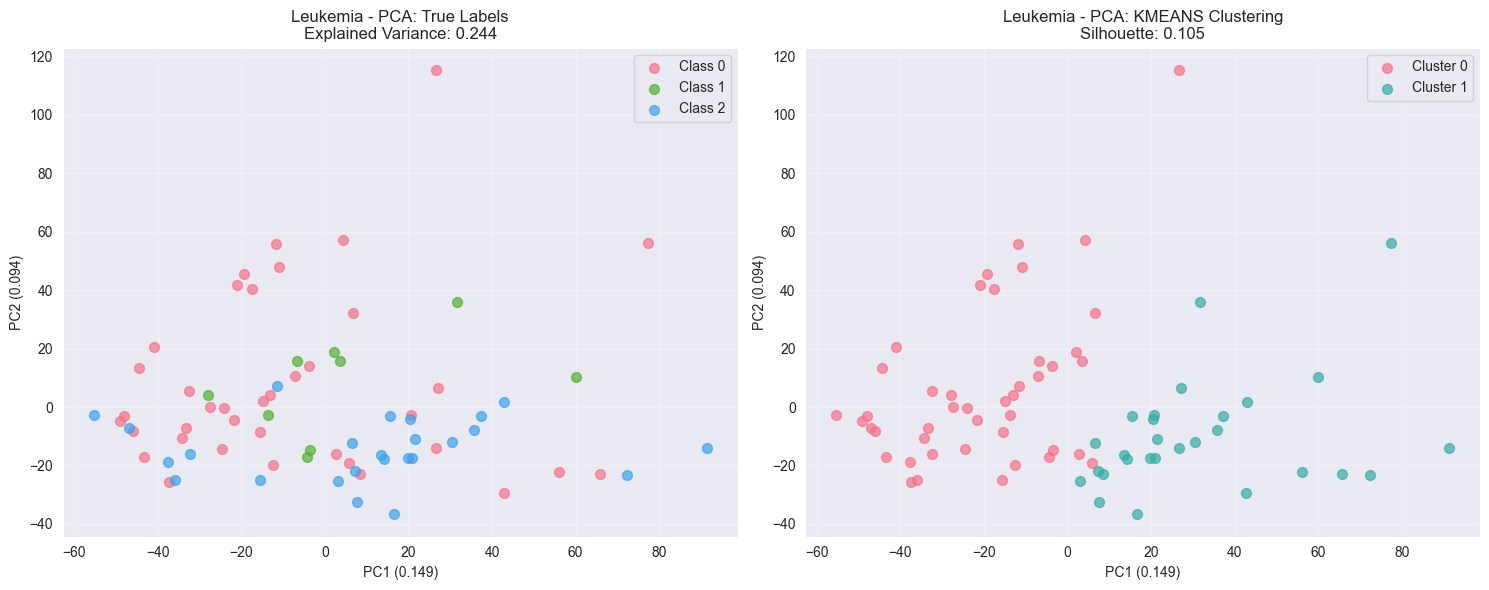

PCA解释方差比: [0.14921586 0.09446173]
累计解释方差: 0.244
KMEANS - 最佳参数: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 42}
轮廓系数: 0.1053, 调整兰德指数: 0.1878, 簇数: 2

正在调参 dbscan...


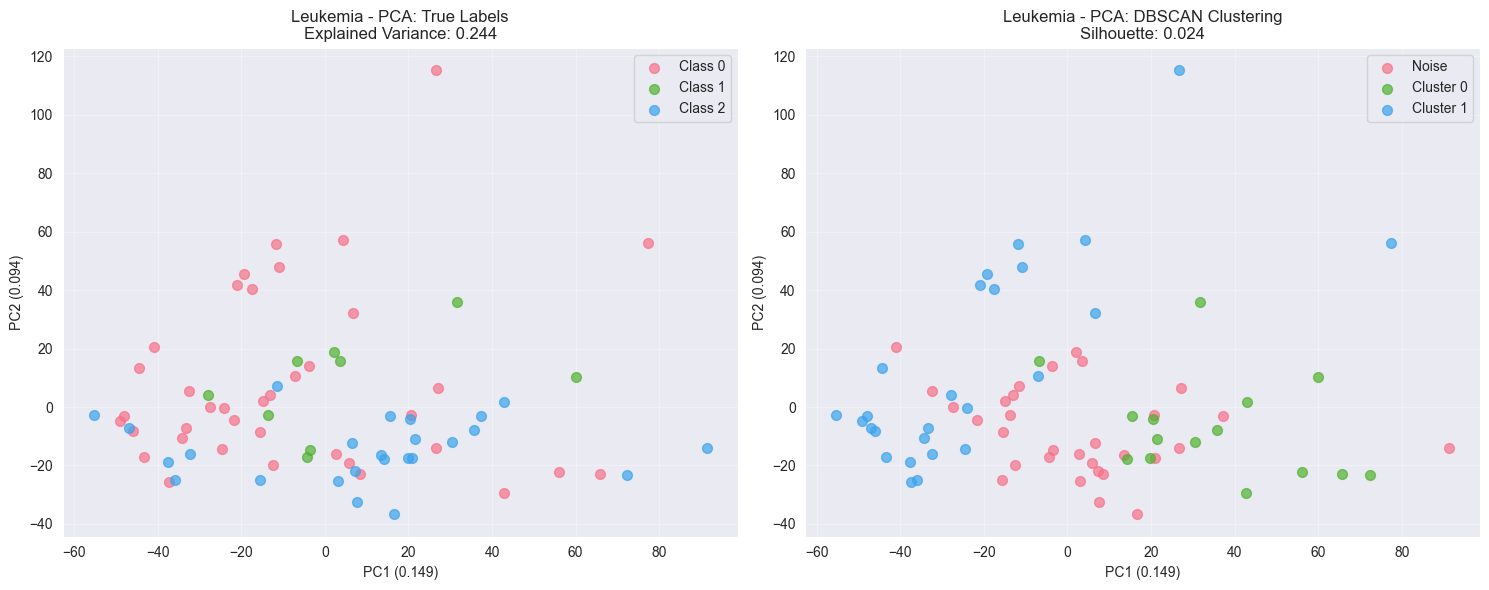

PCA解释方差比: [0.14921586 0.09446173]
累计解释方差: 0.244
DBSCAN - 最佳参数: {'eps': 0.7, 'metric': 'cosine', 'min_samples': 3}
轮廓系数: 0.0241, 调整兰德指数: 0.0799, 簇数: 3

正在调参 agglomerative...


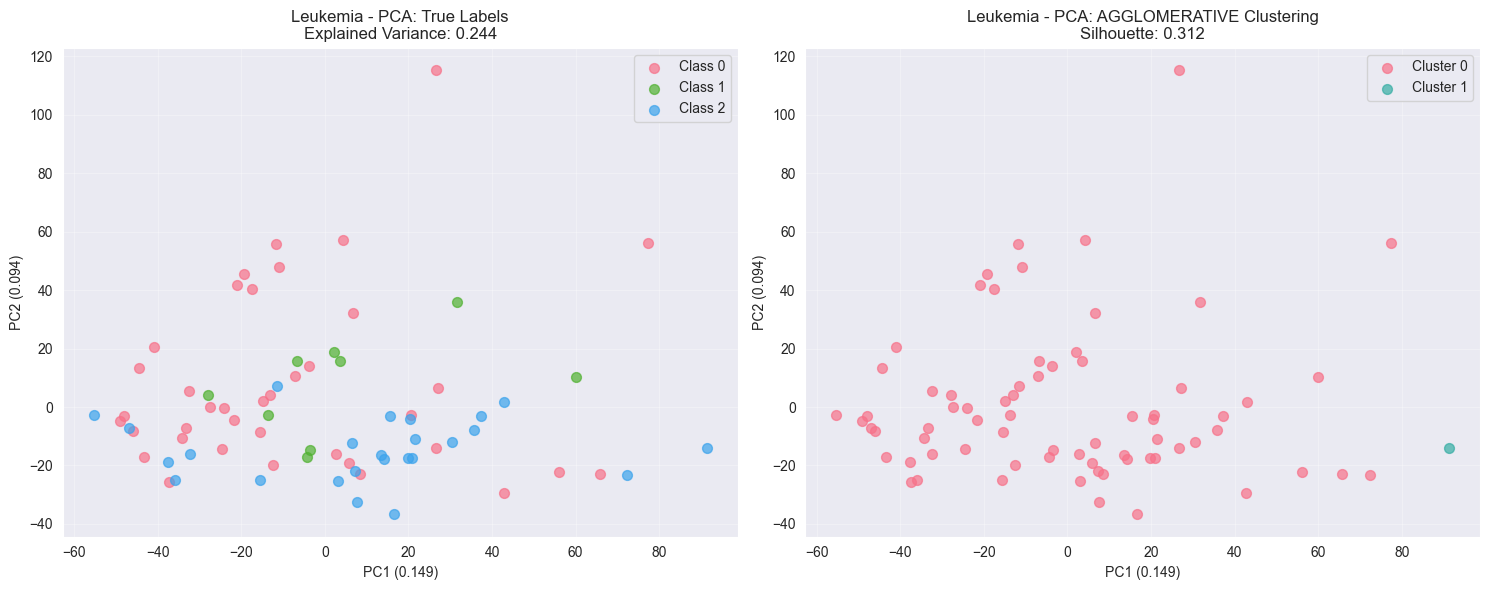

PCA解释方差比: [0.14921586 0.09446173]
累计解释方差: 0.244
AGGLOMERATIVE - 最佳参数: {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 2}
轮廓系数: 0.3123, 调整兰德指数: 0.0065, 簇数: 2

正在调参 affinity...


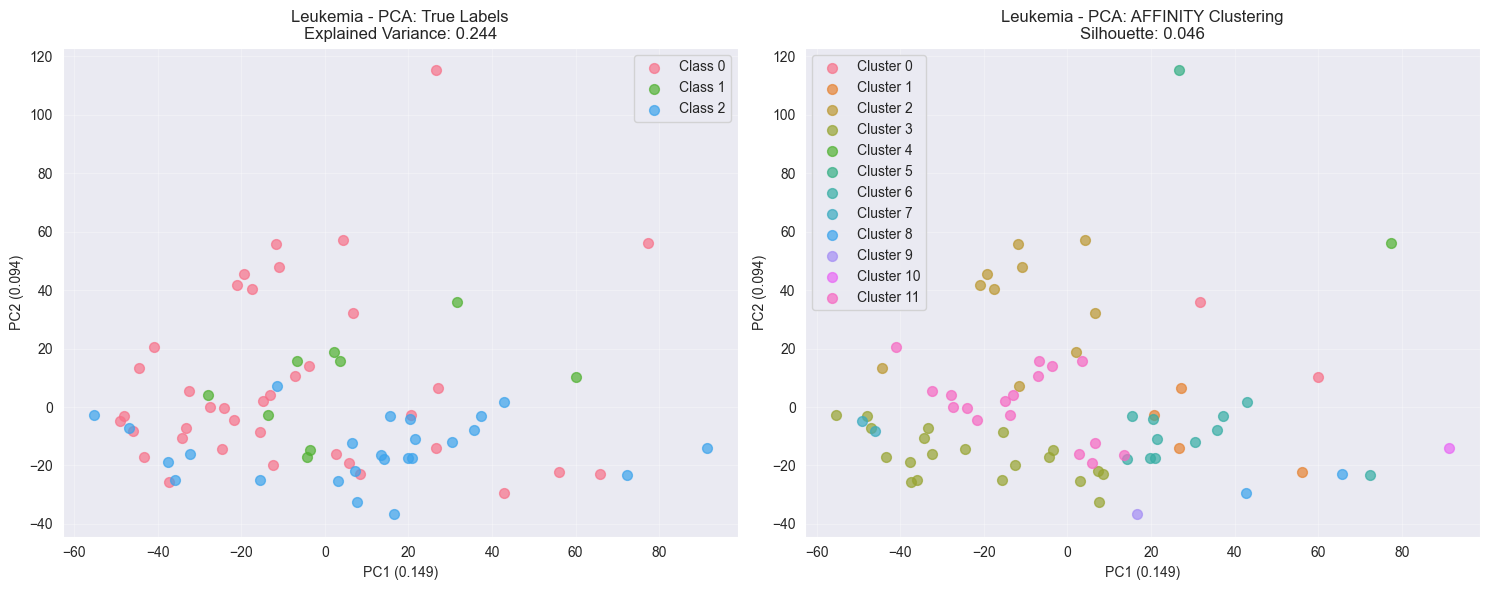

PCA解释方差比: [0.14921586 0.09446173]
累计解释方差: 0.244
AFFINITY - 最佳参数: {'convergence_iter': 25, 'damping': 0.6, 'max_iter': 500, 'preference': None, 'random_state': 42}
轮廓系数: 0.0458, 调整兰德指数: 0.0896, 簇数: 12

Leukemia数据集最佳聚类方法:
       Method  Silhouette_Score  Calinski_Harabasz_Score  N_Clusters  N_Noise  Adjusted_Rand_Index                                                                                       Best_Params  Best_Score
AGGLOMERATIVE          0.312315                 3.182872           2        0             0.006465                                   {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 2}    0.220560
       KMEANS          0.105340                 8.178385           2        0             0.187783                          {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10, 'random_state': 42}    0.130073
     AFFINITY          0.045791                 3.491599          12        0             0.089570 {'convergence_iter': 25, 'damping': 0.6, 'max_iter': 5

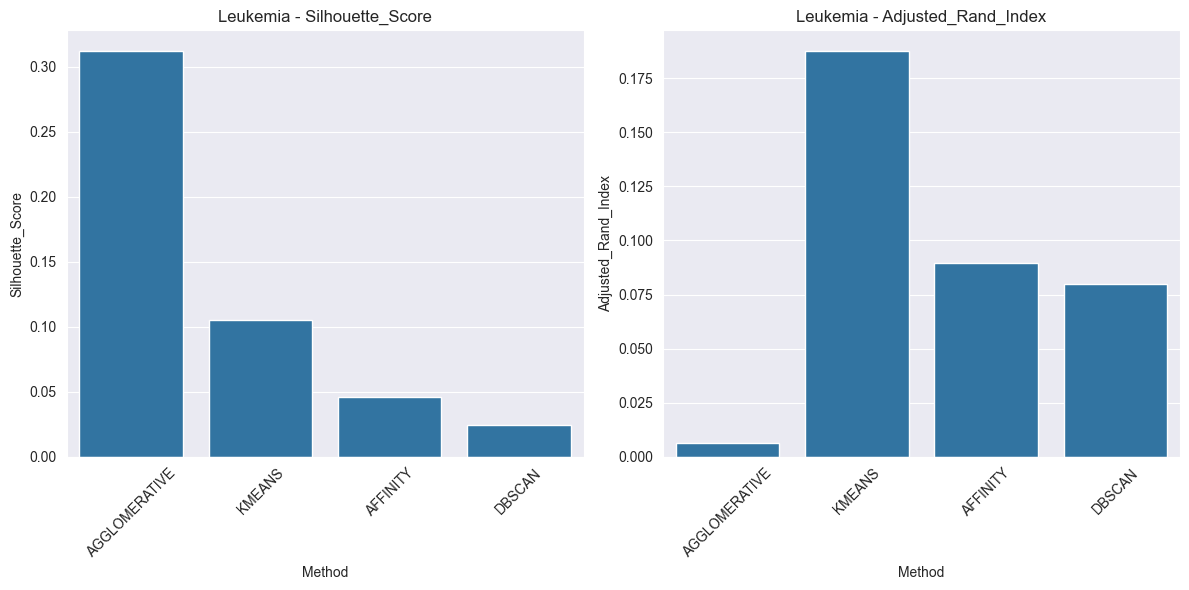


基因特征数量: 7129
前10个基因名称:
  1. AFFX-BioB-5_at (endogenous control)
  2. AFFX-BioB-M_at (endogenous control)
  3. AFFX-BioB-3_at (endogenous control)
  4. AFFX-BioC-5_at (endogenous control)
  5. AFFX-BioC-3_at (endogenous control)
  6. AFFX-BioDn-5_at (endogenous control)
  7. AFFX-BioDn-3_at (endogenous control)
  8. AFFX-CreX-5_at (endogenous control)
  9. AFFX-CreX-3_at (endogenous control)
  10. AFFX-BioB-5_st (endogenous control)

特征重要性分析:


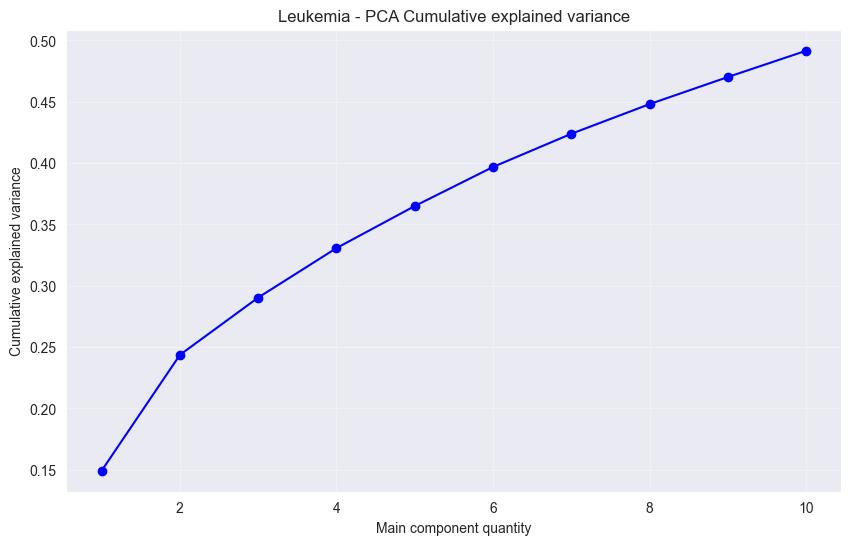

前10个主成分累计解释方差: 0.4916


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 读取Leukemia数据
# 读取基因表达数据
data = np.genfromtxt('./data/LeukemiaDataSet3.dat', delimiter='  ', dtype=str)

# 处理数据
X_leukemia = data[:, 1:].astype(float)  # 基因表达特征
y_leukemia = data[:, 0].astype(float).astype(int)  # 类别标签

# 读取基因名称（如果有的话）
gene_names_df = pd.read_excel('./data/leukemia_names.xls')
gene_names = gene_names_df['Gene Description'].values
print(f"成功读取Excel文件，列名: {gene_names_df.columns.tolist()}")

# 检查数据基本信息
print(f"样本数: {X_leukemia.shape[0]}, 特征数: {X_leukemia.shape[1]}")
print(f"类别分布: {np.unique(y_leukemia, return_counts=True)}")

# 标准化数据
scaler = StandardScaler()
X_leukemia_scaled = scaler.fit_transform(X_leukemia)

print(f"\nLeukemia数据集基本信息:")
print(f"数据形状: {X_leukemia.shape}")
print(f"特征数: {X_leukemia.shape[1]}")
print(f"样本数: {X_leukemia.shape[0]}")
print(f"真实类别数: {len(np.unique(y_leukemia))}")
print(f"类别分布: {dict(zip(*np.unique(y_leukemia, return_counts=True)))}")


def plot_pca_clustering(X, labels, true_labels, method_name, data_type, n_components=2):
    """绘制PCA降维后的聚类结果"""
    # 执行PCA降维
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)

    # 创建子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 子图1：真实标签
    if true_labels is not None:
        unique_true = sorted(np.unique(true_labels))
        colors_true = sns.color_palette("husl", len(unique_true))

        for i, label in enumerate(unique_true):
            mask = true_labels == label
            ax1.scatter(X_pca[mask, 0], X_pca[mask, 1],
                        c=[colors_true[i]], label=f'Class {label}', alpha=0.7, s=50)

        ax1.set_title(f'{data_type} - PCA: True Labels\n'
                      f'Explained Variance: {pca.explained_variance_ratio_.sum():.3f}')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

    # 子图2：聚类结果
    unique_clusters = sorted(np.unique(labels))
    colors_clusters = sns.color_palette("husl", len(unique_clusters))

    for i, cluster in enumerate(unique_clusters):
        mask = labels == cluster
        cluster_label = f'Cluster {cluster}' if cluster != -1 else 'Noise'
        ax2.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=[colors_clusters[i]], label=cluster_label, alpha=0.7, s=50)

    # 计算轮廓系数（排除只有一个簇的情况）
    if len(np.unique(labels)) > 1:
        sil_score = silhouette_score(X, labels)
    else:
        sil_score = -1

    ax2.set_title(f'{data_type} - PCA: {method_name} Clustering\n'
                  f'Silhouette: {sil_score:.3f}')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 设置坐标轴标签
    for ax in [ax1, ax2]:
        ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f})')
        ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f})')

    plt.tight_layout()
    plt.show()

    # 打印PCA信息
    print(f"PCA解释方差比: {pca.explained_variance_ratio_}")
    print(f"累计解释方差: {pca.explained_variance_ratio_.sum():.3f}")


# 评估聚类结果
def evaluate_clustering(X, labels, true_labels=None, method_name="", data_type="", plot_pca=True):
    """评估聚类结果"""
    results = {'Method': method_name}

    # 无监督评估指标
    if len(np.unique(labels)) > 1:
        results['Silhouette_Score'] = silhouette_score(X, labels)
        results['Calinski_Harabasz_Score'] = calinski_harabasz_score(X, labels)
        results['N_Clusters'] = len(np.unique(labels))
        results['N_Noise'] = np.sum(labels == -1) if -1 in labels else 0
    else:
        results['Silhouette_Score'] = -1
        results['Calinski_Harabasz_Score'] = -1
        results['N_Clusters'] = len(np.unique(labels))
        results['N_Noise'] = np.sum(labels == -1) if -1 in labels else 0

    # 有监督评估指标（如果有真实标签）
    if true_labels is not None:
        results['Adjusted_Rand_Index'] = adjusted_rand_score(true_labels, labels)

    # PCA可视化
    if plot_pca and len(np.unique(labels)) > 1 and true_labels is not None:
        plot_pca_clustering(X, labels, true_labels, method_name, data_type)

    return results


print("\nLeukemia数据集聚类分析")
print("=" * 60)

all_results = []

# 聚类方法列表
methods = ['kmeans', 'dbscan', 'agglomerative', 'affinity']

for method in methods:
    print(f"\n正在调参 {method}...")

    best_model = None
    best_params = {}
    best_score = -np.inf

    if method == 'kmeans':
        # KMeans 参数网格
        param_grid = {
            'n_clusters': range(2, 8),  # 白血病数据通常有2-3类
            'init': ['k-means++', 'random'],
            'n_init': [10, 15],
            'random_state': [42]
        }
        for params in ParameterGrid(param_grid):
            model = KMeans(**params)
            labels = model.fit_predict(X_leukemia_scaled)

            # 计算轮廓系数
            if len(np.unique(labels)) > 1:
                score = silhouette_score(X_leukemia_scaled, labels)

                # 组合分数：轮廓系数 + 调整兰德指数
                if y_leukemia is not None:
                    ari = adjusted_rand_score(y_leukemia, labels)
                    score = 0.7 * score + 0.3 * ari

                if score > best_score:
                    best_score = score
                    best_params = params
                    best_model = model

    elif method == 'dbscan':
        # DBSCAN 参数网格 - 针对高维数据调整参数范围
        param_grid = {
            'eps': np.arange(0.5, 5.0, 0.2),  # 高维数据需要更大的eps
            'min_samples': range(2, 15),
            'metric': ['euclidean', 'manhattan', 'cosine']
        }
        for params in ParameterGrid(param_grid):
            model = DBSCAN(**params, n_jobs=-1)
            labels = model.fit_predict(X_leukemia_scaled)

            # 排除所有点都是噪声或只有一个簇的情况
            unique_labels = np.unique(labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

            if n_clusters > 1 and n_clusters < len(X_leukemia) // 2:
                score = silhouette_score(X_leukemia_scaled, labels)

                if y_leukemia is not None:
                    ari = adjusted_rand_score(y_leukemia, labels)
                    score = 0.7 * score + 0.3 * ari

                if score > best_score:
                    best_score = score
                    best_params = params
                    best_model = model

    elif method == 'agglomerative':
        # 层次聚类参数网格
        param_grid = {
            'n_clusters': range(2, 8),
            'linkage': ['ward', 'complete', 'average'],
            'metric': ['euclidean', 'manhattan']
        }

        for params in ParameterGrid(param_grid):
            # ward 方法只能使用欧氏距离
            if params['linkage'] == 'ward' and params['metric'] != 'euclidean':
                continue

            model = AgglomerativeClustering(**params)
            labels = model.fit_predict(X_leukemia_scaled)

            if len(np.unique(labels)) > 1:
                score = silhouette_score(X_leukemia_scaled, labels)

                if y_leukemia is not None:
                    ari = adjusted_rand_score(y_leukemia, labels)
                    score = 0.7 * score + 0.3 * ari

                if score > best_score:
                    best_score = score
                    best_params = params
                    best_model = model

    elif method == 'affinity':
        # Affinity Propagation 参数网格 - 针对高维数据调整
        param_grid = {
            'damping': np.arange(0.5, 0.9, 0.1),
            'max_iter': [500, 1000],
            'convergence_iter': [25, 50],
            'preference': [None, -100, -200, -500],  # 高维数据需要更小的preference
            'random_state': [42]
        }
        for params in ParameterGrid(param_grid):
            model = AffinityPropagation(**params)
            labels = model.fit_predict(X_leukemia_scaled)

            if len(np.unique(labels)) > 1 and len(np.unique(labels)) < len(X_leukemia) // 2:
                score = silhouette_score(X_leukemia_scaled, labels)

                if y_leukemia is not None:
                    ari = adjusted_rand_score(y_leukemia, labels)
                    score = 0.7 * score + 0.3 * ari

                if score > best_score:
                    best_score = score
                    best_params = params
                    best_model = model

    # 评估最佳模型
    if best_model is not None:
        # 预测标签
        labels = best_model.fit_predict(X_leukemia_scaled)

        # 评估结果
        results = evaluate_clustering(X_leukemia_scaled, labels, y_leukemia, method.upper(), "Leukemia")
        results['Best_Params'] = str(best_params)
        results['Best_Score'] = best_score
        all_results.append(results)

        print(f"{method.upper()} - 最佳参数: {best_params}")
        print(f"轮廓系数: {results['Silhouette_Score']:.4f}, "
              f"调整兰德指数: {results.get('Adjusted_Rand_Index', 'N/A'):.4f}, "
              f"簇数: {results['N_Clusters']}")
    else:
        print(f"{method.upper()} - 未找到有效参数")

# 显示最佳结果
if all_results:
    print(f"\nLeukemia数据集最佳聚类方法:")
    results_df = pd.DataFrame(all_results)

    # 按轮廓系数排序
    results_df = results_df.sort_values('Silhouette_Score', ascending=False)
    print(results_df.to_string(index=False))

    best_method = results_df.iloc[0]['Method']
    print(f"\n最佳方法: {best_method}")

    # 可视化所有方法的比较
    plt.figure(figsize=(12, 6))

    # 轮廓系数比较
    plt.subplot(1, 2, 1)
    sns.barplot(data=results_df, x='Method', y='Silhouette_Score')
    plt.title('Leukemia - Silhouette_Score')
    plt.xticks(rotation=45)

    # 调整兰德指数比较
    plt.subplot(1, 2, 2)
    sns.barplot(data=results_df, x='Method', y='Adjusted_Rand_Index')
    plt.title('Leukemia - Adjusted_Rand_Index')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # 打印基因特征信息
    if gene_names is not None:
        print(f"\n基因特征数量: {len(gene_names)}")
        print("前10个基因名称:")
        for i, name in enumerate(gene_names[:10]):
            print(f"  {i + 1}. {name}")
else:
    print("未找到有效的聚类结果")

# 特征重要性分析（基于PCA）
print("\n特征重要性分析:")
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_leukemia_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Main component quantity')
plt.ylabel('Cumulative explained variance')
plt.title('Leukemia - PCA Cumulative explained variance')
plt.grid(True, alpha=0.3)
plt.show()

print(f"前10个主成分累计解释方差: {np.cumsum(pca.explained_variance_ratio_)[-1]:.4f}")